In [4]:
from sklearn.datasets import fetch_openml

In [5]:

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [6]:
# DESCR key describes the data set 
# data key one data per row, one column per feature 
# target contains an array with the labels 

In [7]:
X, y = mnist["data"], mnist["target"] 

In [8]:
X.shape # 70,000 rows of data with 784 features 

(70000, 784)

In [9]:
y.shape 

(70000,)

In [10]:
# each image is 28 x 28 pixels = 784 
# each pixel is from 0 ~ 255 white to black 

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


Saving figure some_digit_plot


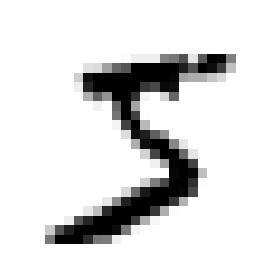

In [11]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

save_fig("some_digit_plot")
plt.show()

In [12]:
y[0]

'5'

In [13]:
y = y.astype(np.uint8)

In [14]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:] # y is the target 

In [15]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [16]:
print(y_train_5)
print(y_test_5)

[ True False False ...  True False False]
[False False False ... False  True False]


In [17]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [18]:
sgd_clf.predict([some_digit])

array([ True])

<h1>Performance Measures</h1>

<h2>Cross-Validation</h2>

In [19]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone 

skfolds = StratifiedKFold(n_splits = 3, random_state = 42, shuffle = True)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    
    print(n_correct / len(y_pred))

    
    
    

0.9669
0.91625
0.96785


In [20]:
from sklearn.model_selection import cross_val_score 

cross_val_score(sgd_clf, X_train, y_train_5, cv = 3, scoring = "accuracy")

array([0.95035, 0.96035, 0.9604 ])

<p> It looks great, right? However, accuracy isn't a great estimator of how good it is, reason being... Kinda intuitive, no? </p>

<h1>Confusion Matrix</h1>

In [21]:
from sklearn.model_selection import cross_val_predict 

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3)


In [22]:
print(y_train_pred)

[ True False False ...  True False False]


In [23]:
from sklearn.metrics import confusion_matrix 
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [24]:
# negative # positive

<h2>Precision</h2>
<p>Represents the accuracy of the positive predictions</p>
<p>Precision = TP / FP + TP</p>


<h2>Sensitivity</h2>
<p>Sensititivity represents how good the classifier is</p>
<p> Sensitivity = TP/TP + FN</p>

In [25]:
from sklearn.metrics import precision_score, recall_score 

print(precision_score(y_train_5, y_train_pred))

print(recall_score(y_train_5, y_train_pred))

0.8370879772350012
0.6511713705958311


<h2>F-score (combining both precision and sensitivity)</h2>

<p>F-score = 2/(reciprocal of precision + reciprocal of sensitivity)</p>

In [26]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846

<p>Precision and sensitivity trade-offs</p>

In [29]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3, method = "decision_function")

In [33]:
from sklearn.metrics import precision_recall_curve 

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

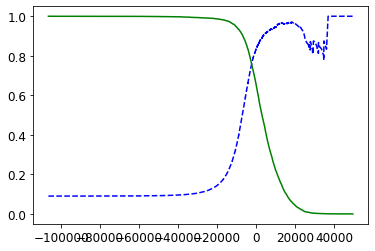

In [36]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label = "Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label = "Recall")
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [37]:
# the higher the threshold , the higher the precision , because it takes more of that feature , leading to a higher precision


In [38]:
# hence lower the recall 

In [39]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, label = "Precision vs recall")
    plt.show()

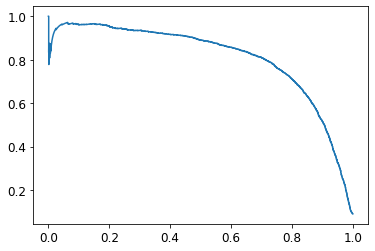

In [40]:
plot_precision_vs_recall(precisions, recalls)

<p> Suppose you're doing a project which requires 90% precision </p>

In [41]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

In [42]:
print(threshold_90_precision)

3370.0194991439557


In [43]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [44]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [45]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

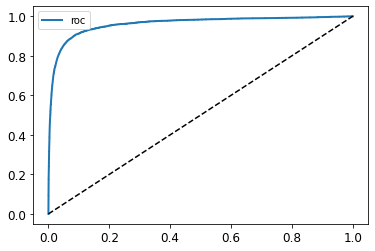

In [51]:
from sklearn.metrics import roc_curve

def plot_roc_curve(fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth = 2, label = label)
    plt.plot([0,1], 'k--')
    plt.legend()
    plt.axis() 

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)
plot_roc_curve(fpr, tpr, "roc")
plt.show()

In [52]:
from sklearn.metrics import roc_auc_score


roc_auc_score(y_train_5, y_scores)


0.9604938554008616

In [53]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state = 42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv = 3, method = "predict_proba")

In [54]:
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

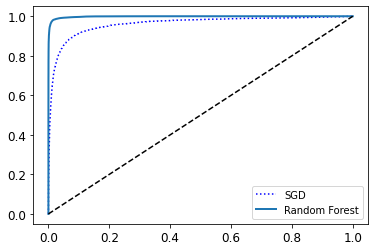

In [55]:
plt.plot(fpr, tpr, "b:", label = "SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc = "lower right")
plt.show()

In [56]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

<h2>One versus the rest </h2>

<p>So if we want multiple classes, we can train multiple binary classifiers</p>

<p>Select the one with the highest score </p>

<h2>One versus one strategy</h2>

<p>Essentially the pair with the highest win rate </p>


In [57]:
# SVMs prefer smaller training sets, so its faster to train multiple small training sets 

# others prefer OvR


In [59]:
from sklearn.svm import SVC


svm_clf = SVC()
svm_clf.fit(X_train, y_train)
print(svm_clf.predict([some_digit]))

[5]
